This program is designed to ask its users to determine the 'adequacy' of five given sentences, where every sentence has a mistake in case agreement. The main idea is to find out in what sentences users fail to identify these mistakes the most. 

The program then saves the answers, and creates a bar plot based on the acquired information. The plot displays the amount of all users' incorrect answers (y-axis) given for each sentence (x-axis). 

For the program to work, we need to:
  1. create a dictionary where our sentences as well as correct answers could be stored;
  2. create another dictionary, which is a dictionary of dictionaries, that could store every user's answers;
  3. use the 'input' function so that users could answer the questions;
  4. create yet another dictionary where we could store total amount of mistakes for each sentence;
  5. create a bar plot that would show the results.
  
And, well, we of course need to import certain stuff.

In [1]:
#so that's what we're doing here
!pip install matplotlib 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
style.use('ggplot') #for bar plot

import re #we're going to use regular expressions to check for digits when asking for the number of users

Количество участников: 3
Моё опоздание отразится на зарплату в этом месяце.
Является ли данное предложение грамотно составленным? (да/нет) да
Ваш ответ: да
Она работает заведующей отдела кадров.
Является ли данное предложение грамотно составленным? (да/нет) да
Ваш ответ: да
Я удивляюсь терпением этого человека!
Является ли данное предложение грамотно составленным? (да/нет) нет
Ваш ответ: нет
Управление автомобиля в нетрезвом виде не допускается.
Является ли данное предложение грамотно составленным? (да/нет) да
Ваш ответ: да
Оплатите за проезд!
Является ли данное предложение грамотно составленным? (да/нет) нет
Ваш ответ: нет
Следующий участник.
Моё опоздание отразится на зарплату в этом месяце.
Является ли данное предложение грамотно составленным? (да/нет) да
Ваш ответ: да
Она работает заведующей отдела кадров.
Является ли данное предложение грамотно составленным? (да/нет) нет
Ваш ответ: нет
Я удивляюсь терпением этого человека!
Является ли данное предложение грамотно составленным? (да/

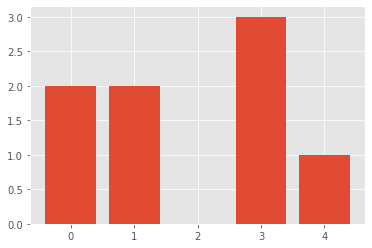

In [5]:
#the main event
d_sentences={'Моё опоздание отразится на зарплату в этом месяце.':"нет", 'Она работает заведующей отдела кадров.':"нет", "Я удивляюсь терпением этого человека!":"нет", "Управление автомобиля в нетрезвом виде не допускается.":"нет", "Оплатите за проезд!":"нет"}
d_subjects={} #key=sentence, value=answer
dic_dic={} #dictionary of dictionaries

amount_of_subjects=input("Количество участников: ")#we need to know how many users are taking part in this little survey
res=re.search('\d',amount_of_subjects) #here we're looking for digits!
while res==None: #if there are no digits to be found in the answer...
    print("Введите число.")
    amount_of_subjects=input("Количество участников: ")#we're being persistent
    res=re.search('\d',amount_of_subjects)

for j in range(int(amount_of_subjects)):  #for every user we do the following:
    for i in list(d_sentences):
        print(i)                                                                        #we print every sentence one by one,
        theInput=input('Является ли данное предложение грамотно составленным? (да/нет) ')#and then ask this question.
        theInput=theInput.lower()                    #we do this so that if the user answers "Да" for instance, 
        while theInput!='да' and theInput!='нет':    #the program could still recognize it as the answer it's looking for
            print('Ошибка.')        
            theInput=input('Пожалуйста, введите да или нет. ')    #only "да/нет" answers to be given!    
        print('Ваш ответ:', theInput) #shows the answer
        d_subjects[i]=theInput        #saves it
    dic_dic["subject"+str(j)]=d_subjects.copy()  #so that python could save all users' answers into dic of dics
    if j!=int(amount_of_subjects)-1:      #if the next user is not the last one...
        print("Следующий участник.")      #...the loop goes on

print(dic_dic)
mistakes_dic=d_sentences.copy() #that's a dictionary of mistakes, where key=sentence:value=total amount of incorrect answers
                                #but for now it's just a copy of our dict of sentences
for i in list(mistakes_dic):
    mistakes_dic[i]=0   #we turn values into 0
for j in range(int(amount_of_subjects)):
    proxydic=dic_dic['subject'+str(j)] #we put a certain 'subjectJ' into our proxy dict
                                       #of sentences and answers
    for i in list(d_sentences):       #here we search for every case where an incorrect answer was given...
        if d_sentences[i]!=proxydic[i]:
            mistakes_dic[i]+=1              #...and increment the total number of incorrect answers by one
print(mistakes_dic)

#finally, the bar plot

plt.bar(range(len(mistakes_dic)), list(mistakes_dic.values())) #X and Y, accordingly
                                                                #i've also decided to turn sentences 
                                                                #into numbers, because otherwise
                                                                #it looks like a mess...
plt.show()

Now, this is just a prototype of a program, although I tried my very best to prevent the occurence of as many casualties as I could think of. Still, I believe there are further modifications to be made, so I am open for suggestions!